# Data Collection Phase

You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. More the data better the model that gets created later. In this section you need to scrape the reviews of different Laptops, Smart Phones, Headphones, Smart Watches, Professional Cameras, Printers, Monitors, Home Theaters, Routers etc. from different e-commerce websites.

Basically, we need these columns:
1. reviews of the product.
2. rating of the product.

You can fetch other data as well, if you think data can be useful or can help in the project. It completely depends on your imagination or assumption.

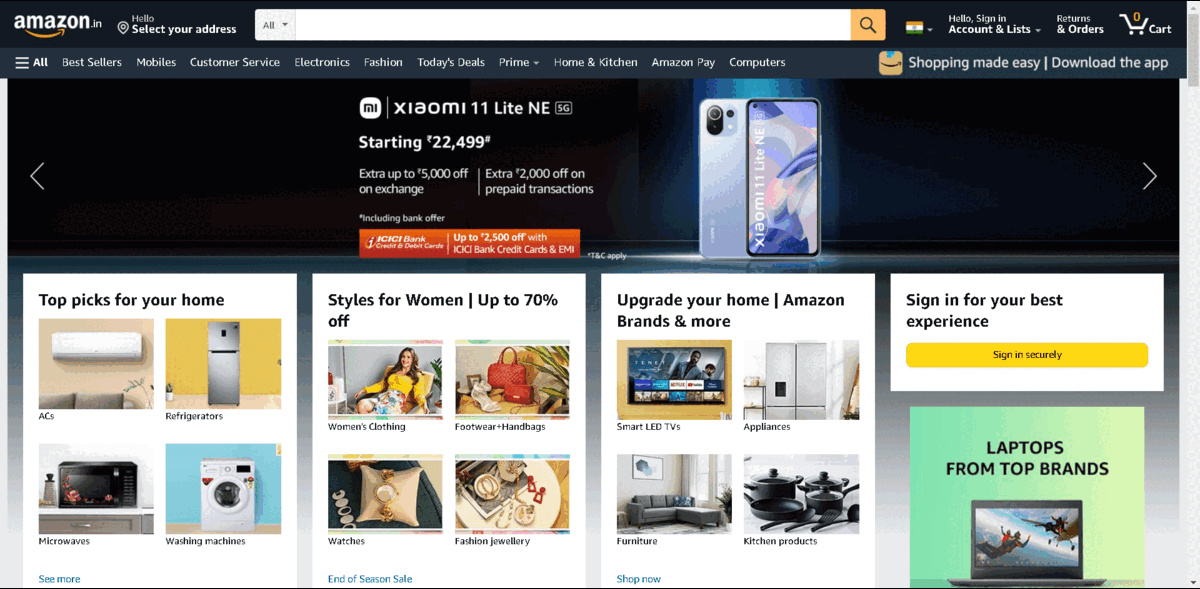

Hint:
- Try to fetch data from different websites. If data is from different websites, it will help our model to remove the effect of over fitting.
- Try to fetch an equal number of reviews for each rating, for example if you are fetching 10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.
- Convert all the ratings to their round number, as there are only 5 options for rating i.e., 1,2,3,4,5. If a rating is 4.5 convert it 5.

In [ ]:
# Import all the neccessary libraries

import selenium
import pandas as pd
import time
import  requests
from  bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

### Reviews from Flipkart.com

In [ ]:
driver = webdriver.Chrome(r"C:\Users\swrai\Desktop\Ratings Prediction Project Data (Flip Robo)\chromedriver.exe")
url = "https://www.flipkart.com/"
driver.get(url)
time.sleep(2)
#clicking on cancel buttopn 
driver.find_element_by_xpath("//div[@class='_2QfC02']/button").click()
srch_items = ['laptops', 'Phones','smart watches','Monitors']
title = []
review_text = []
ratings = []

In [ ]:
def scrap():    
        for i in driver.find_elements_by_xpath("//div[@class='t-ZTKy']"):
            review_text.append(i.text)
        for i in driver.find_elements_by_xpath("//p[@class='_2-N8zT']"):
            title.append(i.text)
        for i in driver.find_elements_by_xpath("//p[@class='_2-N8zT']/../div"):
            ratings.append(i.text)
        return
urls=[]
for i in srch_items:
    # Find the search bar
    srchBar = driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
    srchBar.clear()
    srchBar.send_keys(i)
    # Clicking on the search button
    driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()
    time.sleep(3)
    page = []
    for i in driver.find_elements_by_xpath("//nav[@class='yFHi8N']/a"):
        page.append(i.get_attribute('href'))
    for i in page[0:4]:
        driver.get(i)
        time.sleep(3)
        items = driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
        for i in items:
            urls.append(i.get_attribute('href'))
len(urls)            

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    for _ in range(2):
        driver.execute_script("window.scrollBy(0,6000)")
        time.sleep(1)
    # Clicking on all reviews
    try:
        btn=driver.find_element_by_xpath("//div[@class='_2c2kV-']/following::a")
        lnk = btn.get_attribute('href')
        driver.get(lnk)
        time.sleep(1)
    except NoSuchElementException:
        pass

    scrap()        
    try:
        n_page=driver.find_elements_by_xpath("//nav[@class='yFHi8N']/a")
        np=[]
        for i in n_page:
            np.append(i.get_attribute('href'))
        for i in np[0:18]:
            driver.get(i)
            time.sleep(1)
            scrap()
    except: continue
len(ratings), len(review_text), len(title)        

In [ ]:
# Creating a dataframe
data = list(zip(title,review_text,ratings))
df = pd.DataFrame(data, columns = ["Review_title","Review_text","Ratings"])
df

In [ ]:
# Saving the data into csv file
df.to_csv(r"C:\Users\swrai\Desktop\Ratings Prediction Project Data (Flip Robo)\flipkart1_reviews.csv")

### Reviews from Amazon.in

In [ ]:
url = "https://www.amazon.in/"
driver.get(url)
time.sleep(3)
srch_items = ['laptops','phones','headphones','smart watches', 'Professional Cameras', 'Printers', 
              'Monitors', 'Home theater', 'Router']
title = []
review_text = []
ratings = []

In [ ]:
for i in srch_items:
    srchbar = driver.find_element_by_id("twotabsearchtextbox")
    srchbar.send_keys(i)
    driver.find_element_by_id("nav-search-submit-button").click()  #clicking on search button
    time.sleep(1)
    item_url = []
    for i in driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']/a"):
        item_url.append(i.get_attribute('href'))
    for i in item_url:
        driver.get(i)
        time.sleep(1)
        for _ in range(2):
            driver.execute_script("window.scrollBy(0,6000)")
            time.sleep(1)
        # Clicking on see all reviews
        try:
            driver.find_element_by_xpath("//a[@class='a-link-emphasis a-text-bold']").click()
        except:
            pass
        
        url_ = []
        try:
            two_str = driver.find_element_by_xpath("//table[@id='histogramTable']/tbody/tr[4]/td[2]/a")
            url_.append(two_str.get_attribute('href'))
        except: pass
        try:
            three_str = driver.find_element_by_xpath("//table[@id='histogramTable']/tbody/tr[3]/td[2]/a")
            url_.append(three_str.get_attribute('href'))
        except: pass
        try:
            one_str = driver.find_element_by_xpath("//table[@id='histogramTable']/tbody/tr[5]/td[2]/a")
            url_.append(one_str.get_attribute('href'))
        except: pass
        try:
            fiv_str = driver.find_element_by_xpath("//table[@id='histogramTable']/tbody/tr[1]/td[2]/a")
            url_.append(fiv_str.get_attribute('href'))
        except: pass
        try:
            four_str = driver.find_element_by_xpath("//table[@id='histogramTable']/tbody/tr[2]/td[2]/a")
            url_.append(four_str.get_attribute('href'))
        except: pass
        
        for i in url_:
            driver.get(i)
            time.sleep(1)
            for i in range(10):
                ids = driver.find_elements_by_xpath("//div[@class='a-section a-spacing-none review-views celwidget']/div")
                comment_ids = []
                for i in ids:
                    comment_ids.append(i.get_attribute('id'))

                for x in comment_ids:
                    # Extract user ids from each user on a page
                    try:
                        review_title = driver.find_element_by_xpath('//*[@id="' + x +'"]/div/div/div[2]/a[2]/span[1]')
                        title.append(review_title.get_attribute("innerHTML"))
                    except NoSuchElementException:
                        title.append('')

                    try:
                        rating = driver.find_element_by_xpath('//*[@id="' + x +'"]/div/div/div[2]/a[1]/i/span[1]')
                        ratings.append(rating.get_attribute("innerHTML"))
                    except NoSuchElementException:
                        ratings.append('')

                    try:
                        text = driver.find_element_by_xpath('//*[@id="' + x +'"]/div/div/div[4]/span/span')
                        review_text.append(text.get_attribute("innerHTML"))
                    except NoSuchElementException:
                        review_text.append('')
                try:
                    driver.find_element_by_xpath("//ul[@class='a-pagination']/li[2]/a").click()
                    time.sleep(3)
                except : break 
len(ratings), len(title), len(review_text)

In [ ]:
# Creating a dataframe
data = list(zip(title,review_text,ratings))
df = pd.DataFrame(data, columns = ["Review_title","Review_text","Ratings"])
df

In [ ]:
# Saving the data into csv file
df.to_csv(r"C:\Users\swrai\Desktop\Ratings Prediction Project Data (Flip Robo)\amazon1_reviews.csv")

In [ ]:
# lets load the flipkart and amazon reviews files to combine them together in a single csv file
flipkart = pd.read_csv(r"C:\Users\swrai\Desktop\Ratings Prediction Project Data (Flip Robo)\flipkart1_reviews.csv")
amazon = pd.read_csv(r"C:\Users\swrai\Desktop\Ratings Prediction Project Data (Flip Robo)\amazon1_reviews.csv")
reviews = pd.concat([amazon, flipkart], ignore_index=True)
reviews.drop(columns = 'Unnamed: 0', inplace=True)
reviews

In [ ]:
# Saving the final data into csv file
reviews.to_csv(r"C:\Users\swrai\Desktop\Ratings Prediction Project Data (Flip Robo)\Review_Rating_Datafile.csv")